In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv')

In [2]:
df.describe()

# Check if 'id' column exists before dropping it
if 'id' in df.columns:
	df = df.drop(['id'], axis=1)
else:
	print("'id' column not found in the dataframe.")


In [3]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Value counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


Value counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Value counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


Value counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


Value counts for stroke:
stroke
0    4861
1     249
Name: count, dtype: int64




In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
# Identifying missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Identifying outliers using the IQR method
# Considering only continuous columns for outlier detection
continuous_columns = ['age', 'avg_glucose_level', 'bmi']



Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


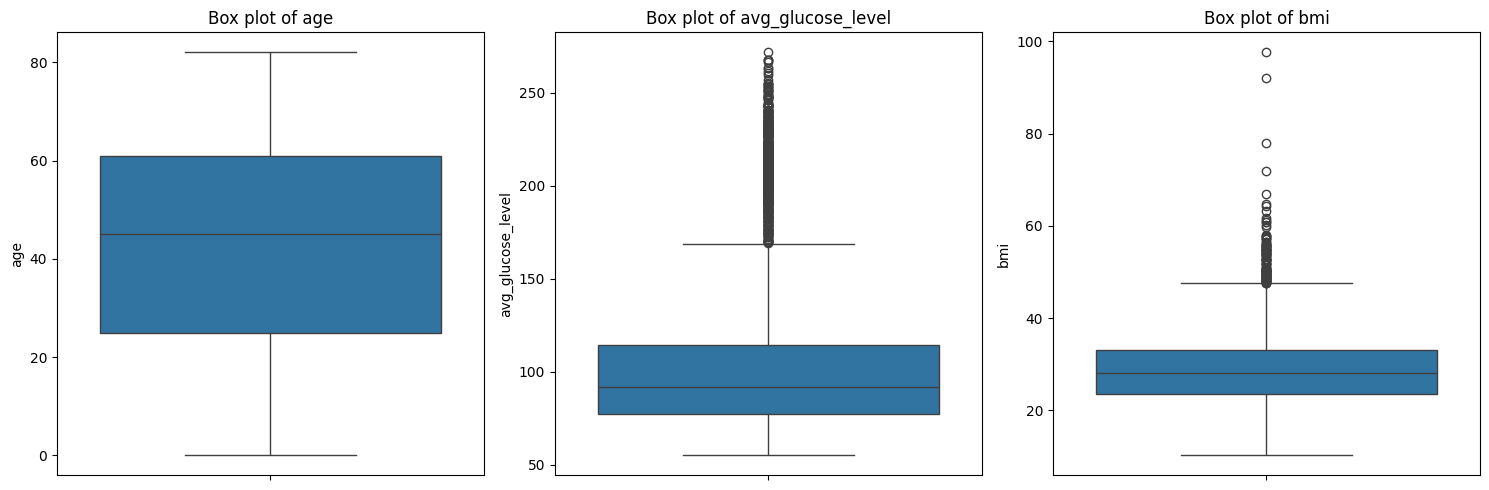

In [6]:
# Visualizing outliers using box plots
plt.figure(figsize=(15, 5))

for i, column in enumerate(continuous_columns):
    plt.subplot(1, len(continuous_columns), i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.impute import KNNImputer

# Selecting the columns to be used for KNN imputation
columns_for_imputation = ['age', 'avg_glucose_level', 'bmi']

# Creating a new dataframe with only the selected columns
df_impute = df[columns_for_imputation]

# Initializing the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Performing the imputation
df_imputed = imputer.fit_transform(df_impute)

# Assigning the imputed values back to the original dataframe
df['bmi'] = df_imputed[:, 2]

print("Missing values after imputation:")
print(df['bmi'].isnull().sum())

Missing values after imputation:
0


In [8]:
# Encoding categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)

print("Encoded dataframe:")
print(df_encoded.head())

Encoded dataframe:
   age  hypertension  heart_disease  avg_glucose_level  bmi  gender_Male  \
0   67             0              1                228   36            1   
1   61             0              0                202   31            0   
2   80             0              1                105   32            1   
3   49             0              0                171   34            0   
4   79             1              0                174   24            0   

   gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0             0                 1                       0                  1   
1             0                 1                       0                  0   
2             0                 1                       0                  1   
3             0                 1                       0                  1   
4             0                 1                       0                  0   

   work_type_Self-employed  work_type_child

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Selecting features and target variable
X = df_encoded.drop(columns=['stroke_1'])
y = df_encoded['stroke_1']

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=10)

# Printing the cross-validation scores
print("10-fold cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

10-fold cross-validation scores: [0.94716243 0.94911937 0.94911937 0.94911937 0.94716243 0.94911937
 0.94716243 0.94911937 0.94911937 0.95107632]
Mean cross-validation score: 0.9487279843444225


In [10]:
# Menghitung matriks korelasi
correlation_matrix = df_encoded.corr()

# Mengambil korelasi dengan variabel target 'stroke_1'
target_correlation = correlation_matrix['stroke_1'].drop('stroke_1')

# Menemukan korelasi yang paling berpengaruh
most_influential_correlation = target_correlation.abs().idxmax()
most_influential_value = target_correlation[most_influential_correlation]

print(f"Korelasi yang paling berpengaruh adalah dengan '{most_influential_correlation}' dengan nilai korelasi {most_influential_value}")

Korelasi yang paling berpengaruh adalah dengan 'age' dengan nilai korelasi 0.2451280760965368


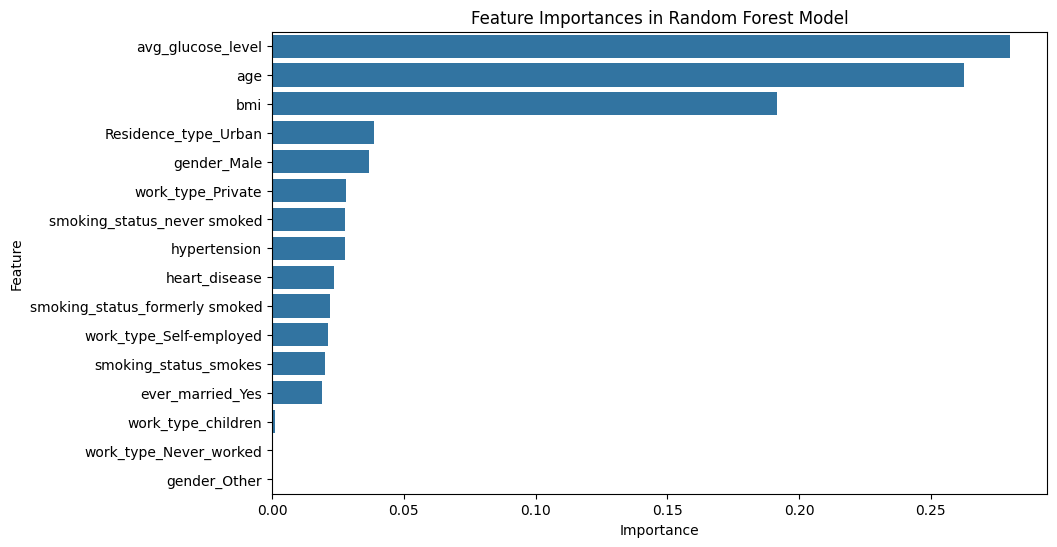

In [11]:
# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initializing the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Performing 10-fold cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=10)

# Printing the cross-validation scores
print("10-fold cross-validation scores for XGBoost:", xgb_cv_scores)
print("Mean cross-validation score for XGBoost:", xgb_cv_scores.mean())

c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

10-fold cross-validation scores for XGBoost: [0.94324853 0.94129159 0.94520548 0.94324853 0.93150685 0.94129159
 0.93933464 0.93933464 0.93542074 0.93933464]
Mean cross-validation score for XGBoost: 0.9399217221135029


c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

df_encoded.info()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the testing data
rus = RandomUnderSampler(random_state=42)
X_test_balanced, y_test_balanced = rus.fit_resample(X_test, y_test)

print("Training set size:", X_train.shape[0])
print("Testing set size before balancing:", X_test.shape[0])
print("Testing set size after balancing:", X_test_balanced.shape[0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             5110 non-null   int64
 1   hypertension                    5110 non-null   int64
 2   heart_disease                   5110 non-null   int64
 3   avg_glucose_level               5110 non-null   int64
 4   bmi                             5110 non-null   int64
 5   gender_Male                     5110 non-null   int64
 6   gender_Other                    5110 non-null   int64
 7   ever_married_Yes                5110 non-null   int64
 8   work_type_Never_worked          5110 non-null   int64
 9   work_type_Private               5110 non-null   int64
 10  work_type_Self-employed         5110 non-null   int64
 11  work_type_children              5110 non-null   int64
 12  Residence_type_Urban            5110 non-null   int64
 13  smo

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Memprediksi hasil pada data testing yang telah di-balance
y_pred_balanced = rf_model.predict(X_test_balanced)

# Menghitung akurasi model
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
report = classification_report(y_test_balanced, y_pred_balanced)

print("Akurasi model pada data testing yang telah di-balance:", accuracy)
print("Classification Report:")
print(report)

Akurasi model pada data testing yang telah di-balance: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        62
           1       0.00      0.00      0.00        62

    accuracy                           0.50       124
   macro avg       0.25      0.50      0.33       124
weighted avg       0.25      0.50      0.33       124



c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yusra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
print("Training Data Details:")
X_train.info()
print("\nTesting Data Details:")
X_test_balanced.info()
stroke_counts = pd.Series(y_pred_balanced).value_counts()
print("Jumlah prediksi stroke dan tidak stroke pada data testing yang telah di-balance:")
print(stroke_counts)

Training Data Details:
<class 'pandas.core.frame.DataFrame'>
Index: 4088 entries, 802 to 860
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             4088 non-null   int64
 1   hypertension                    4088 non-null   int64
 2   heart_disease                   4088 non-null   int64
 3   avg_glucose_level               4088 non-null   int64
 4   bmi                             4088 non-null   int64
 5   gender_Male                     4088 non-null   int64
 6   gender_Other                    4088 non-null   int64
 7   ever_married_Yes                4088 non-null   int64
 8   work_type_Never_worked          4088 non-null   int64
 9   work_type_Private               4088 non-null   int64
 10  work_type_Self-employed         4088 non-null   int64
 11  work_type_children              4088 non-null   int64
 12  Residence_type_Urban            4088 non-nu

In [16]:
zero_count = y_test_balanced.value_counts()[0]
print("Number of zeros in y_test_balanced:", zero_count)

Number of zeros in y_test_balanced: 62


In [17]:
# Visualisasi persebaran data menggunakan pairplot
# sns.pairplot(df_encoded, diag_kind='kde', hue='stroke_1', palette='Set1')
# plt.show()

In [18]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# List to store accuracy scores
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Balance the training data
    X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    
    # Train the model
    rf_model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the cross-validation scores
print("10-fold cross-validation scores with balanced data:", accuracy_scores)
print("Mean cross-validation score with balanced data:", np.mean(accuracy_scores))

10-fold cross-validation scores with balanced data: [0.7162426614481409, 0.6986301369863014, 0.7025440313111546, 0.7221135029354208, 0.7064579256360078, 0.7377690802348337, 0.7377690802348337, 0.7045009784735812, 0.7279843444227005, 0.6692759295499021]
Mean cross-validation score with balanced data: 0.7123287671232876


In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             5110 non-null   int64
 1   hypertension                    5110 non-null   int64
 2   heart_disease                   5110 non-null   int64
 3   avg_glucose_level               5110 non-null   int64
 4   bmi                             5110 non-null   int64
 5   gender_Male                     5110 non-null   int64
 6   gender_Other                    5110 non-null   int64
 7   ever_married_Yes                5110 non-null   int64
 8   work_type_Never_worked          5110 non-null   int64
 9   work_type_Private               5110 non-null   int64
 10  work_type_Self-employed         5110 non-null   int64
 11  work_type_children              5110 non-null   int64
 12  Residence_type_Urban            5110 non-null   int64
 13  smo